# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

import seaborn as sns
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [3]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [4]:
print(data.shape)
print(data.sample(3))
print('---------------')

# checking NaN values
print(f"Any Nan values: {data.isna().values.any()}")
data_clean = data.dropna()
print('---------------')

# checking duplicates
print(f"Any duplicated rows: {data_clean.duplicated().values.any()}")
print(f"How many: {len(data[data.duplicated()])}")
print('---------------')

data_clean = data
data_clean.info()

(5391, 6)
      Rank Release_Date                                        Movie_Title  \
5214  4008    7/15/2016  Hillary’s America: The Secret History of the D...   
1947   987   12/25/2002                                Catch Me if You Can   
2224   241    5/28/2004                             The Day After Tomorrow   

     USD_Production_Budget USD_Worldwide_Gross USD_Domestic_Gross  
5214            $5,000,000         $13,099,931        $13,099,931  
1947           $52,000,000        $355,612,291       $164,606,800  
2224          $125,000,000        $556,319,450       $186,740,799  
---------------
Any Nan values: False
---------------
Any duplicated rows: False
How many: 0
---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-

### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [5]:
# can be done with for loop
data_clean["USD_Production_Budget"] = data_clean["USD_Production_Budget"].astype(str).str.replace('\,|\$', "", regex=True)
data_clean["USD_Worldwide_Gross"] = data_clean["USD_Worldwide_Gross"].astype(str).str.replace('\,|\$', "", regex=True)
data_clean["USD_Domestic_Gross"] = data_clean["USD_Domestic_Gross"].astype(str).str.replace('\,|\$', "", regex=True)

data_clean["USD_Production_Budget"] = pd.to_numeric(data_clean["USD_Production_Budget"])
data_clean["USD_Worldwide_Gross"] = pd.to_numeric(data_clean["USD_Worldwide_Gross"])
data_clean["USD_Domestic_Gross"] = pd.to_numeric(data_clean["USD_Domestic_Gross"])

data_clean.info()
data_clean.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   int64 
 4   USD_Worldwide_Gross    5391 non-null   int64 
 5   USD_Domestic_Gross     5391 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 252.8+ KB


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1478,1533,8/18/2000,The Cell,35000000,85911226,61280963
1295,2884,8/27/1999,The Muse,15000000,11614954,11614954
4099,2870,2/11/2012,The Man with the Iron Fists,15000000,22018988,15634090
3171,315,7/3/2008,"10,000 B.C.",105000000,269065678,94784201
3500,1607,11/9/2009,Whiteout,35000000,12254746,10275638


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [6]:
data_clean["Release_Date"] = pd.to_datetime(data_clean["Release_Date"])

data_clean.info()
data_clean.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2717,601,2006-07-21,Lady in the Water,75000000,72785169,42285169
3292,1018,2008-12-19,Yes Man,50000000,225990976,97690976
275,2196,1980-05-21,Star Wars Ep. V: The Empire Strikes Back,23000000,534171960,290271960
5247,3232,2016-09-23,The Dressmaker,11900000,24041617,2022115
1921,3331,2002-11-22,Friday After Next,10000000,33526835,33253609


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [7]:
# 1
print(f"Average budget: {data_clean['USD_Production_Budget'].mean()}")
# 2
print(f"Average worldwide gross: {data_clean['USD_Worldwide_Gross'].mean()}")
# 3
print(f"Minimum worldwide gross: {data_clean['USD_Worldwide_Gross'].min()}")
print(f"Minimum domestic gross: {data_clean['USD_Domestic_Gross'].min()}")
# 4
# in this case it is easier to use .describe()
print(data_clean.describe())
# 5
high_prod_id = data_clean[data_clean.index == data_clean["USD_Production_Budget"].idxmax()]
print(f"Highest production cost movie: {high_prod_id['Movie_Title']} with production cost of {int(high_prod_id['USD_Production_Budget'])}")
high_gross_id = data_clean[data_clean.index == data_clean["USD_Worldwide_Gross"].idxmax()]
print(f"Highest gross movie: {high_gross_id['Movie_Title']} with gross value of {int(high_gross_id['USD_Worldwide_Gross'])}")
# 6
low_prod_id = data_clean[data_clean.index == data_clean["USD_Production_Budget"].idxmin()]
print(f"Highest production cost movie: {high_prod_id['Movie_Title']} made {int(high_prod_id['USD_Worldwide_Gross'])}")
print(f"Lowest production cost movie: {low_prod_id['Movie_Title']} made {int(low_prod_id['USD_Worldwide_Gross'])}")

Average budget: 31113737.57837136
Average worldwide gross: 88855421.96271564
Minimum worldwide gross: 0
Minimum domestic gross: 0
          Rank  USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross
count 5,391.00               5,391.00             5,391.00            5,391.00
mean  2,696.00          31,113,737.58        88,855,421.96       41,235,519.44
std   1,556.39          40,523,796.88       168,457,757.00       66,029,346.27
min       1.00               1,100.00                 0.00                0.00
25%   1,348.50           5,000,000.00         3,865,206.00        1,330,901.50
50%   2,696.00          17,000,000.00        27,450,453.00       17,192,205.00
75%   4,043.50          40,000,000.00        96,454,455.00       52,343,687.00
max   5,391.00         425,000,000.00     2,783,918,982.00      936,662,225.00
Highest production cost movie: 3529    Avatar
Name: Movie_Title, dtype: object with production cost of 425000000
Highest gross movie: 3529    Avatar
Name: Movi

# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [8]:
zero_dom_gross = data_clean[data_clean['USD_Domestic_Gross']==0]
print(f"Number of films grossed 0$ domestically: {zero_dom_gross['Movie_Title'].count()}")
print(f"Number of films grossed 0$ domestically: {zero_dom_gross['USD_Production_Budget'].max()}")

Number of films grossed 0$ domestically: 512
Number of films grossed 0$ domestically: 175000000


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [9]:
zero_world_gross = data_clean[data_clean['USD_Worldwide_Gross']==0]
print(f"Number of films grossed 0$ domestically: {len(zero_world_gross['Movie_Title'])}")

Number of films grossed 0$ domestically: 357


### Filtering on Multiple Conditions

In [10]:
international_releases = data.loc[(data.USD_Domestic_Gross == 0) & 
                                  (data.USD_Worldwide_Gross != 0)]

international_releases.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [11]:
international_releases = data_clean.query("USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0")
print(f'Number of international releases: {len(international_releases)}')
international_releases.head()

Number of international releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [12]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')
unreleased = data_clean[data_clean['Release_Date'] > scrape_date]
unreleased

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [13]:
data_clean = data.drop(unreleased.index)

### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [14]:
all_films = len(data_clean) 
lost_money = len(data_clean.query("USD_Worldwide_Gross-USD_Production_Budget < 0"))
print(f"Percentage of non profitable films {'{:.2f}'.format(lost_money/all_films)}")

Percentage of non profitable films 0.37


# Seaborn for Data Viz: Bubble Charts

[(0.0, 3000000000.0),
 Text(0, 0.5, 'Revenue in $ billions'),
 (0.0, 450000000.0),
 Text(0.5, 0, 'Budget in $100 millions')]

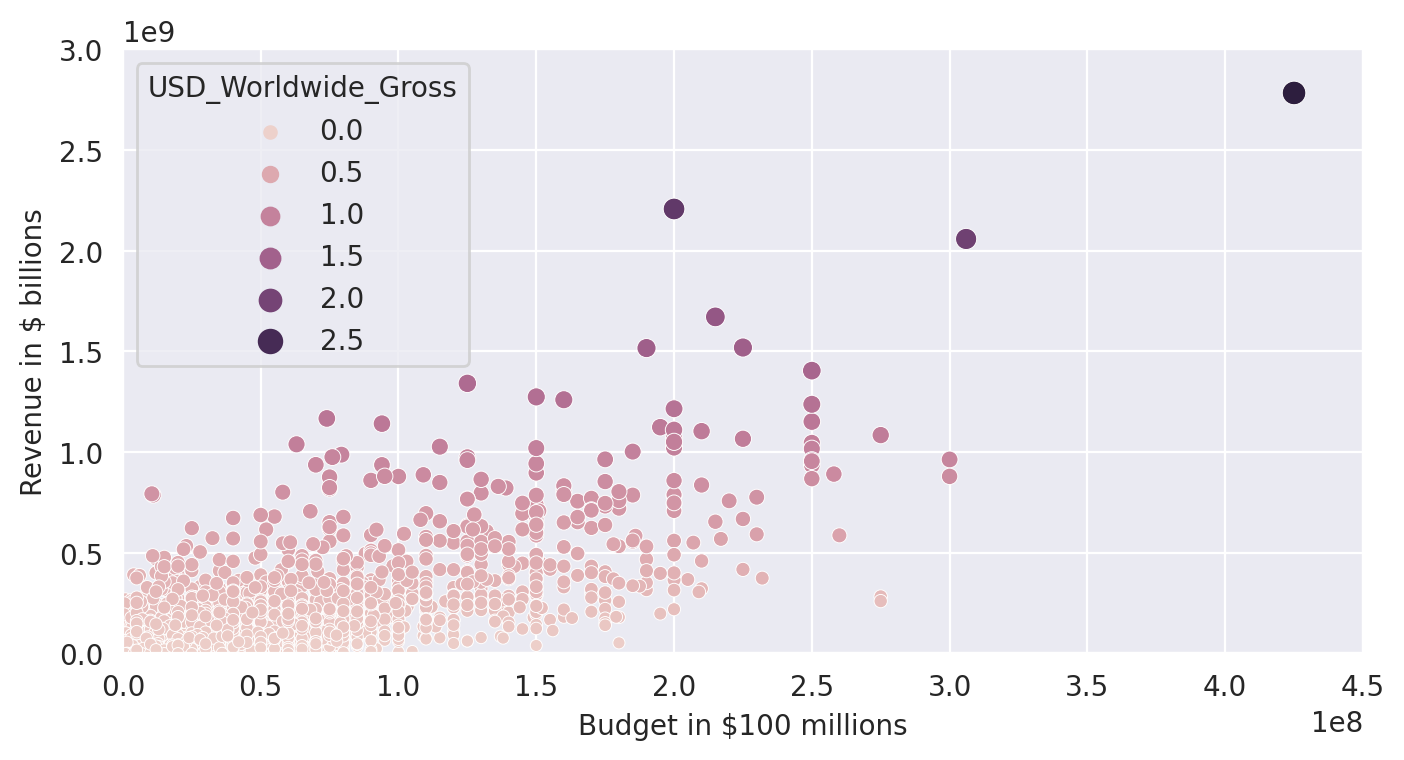

In [15]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_clean,
                       x='USD_Production_Budget', 
                       y='USD_Worldwide_Gross',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross')
 

ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')


### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



[(0.0, 450000000.0),
 Text(0, 0.5, 'Budget in $100 millions'),
 (699287.0, 736694.0),
 Text(0.5, 0, 'Year')]

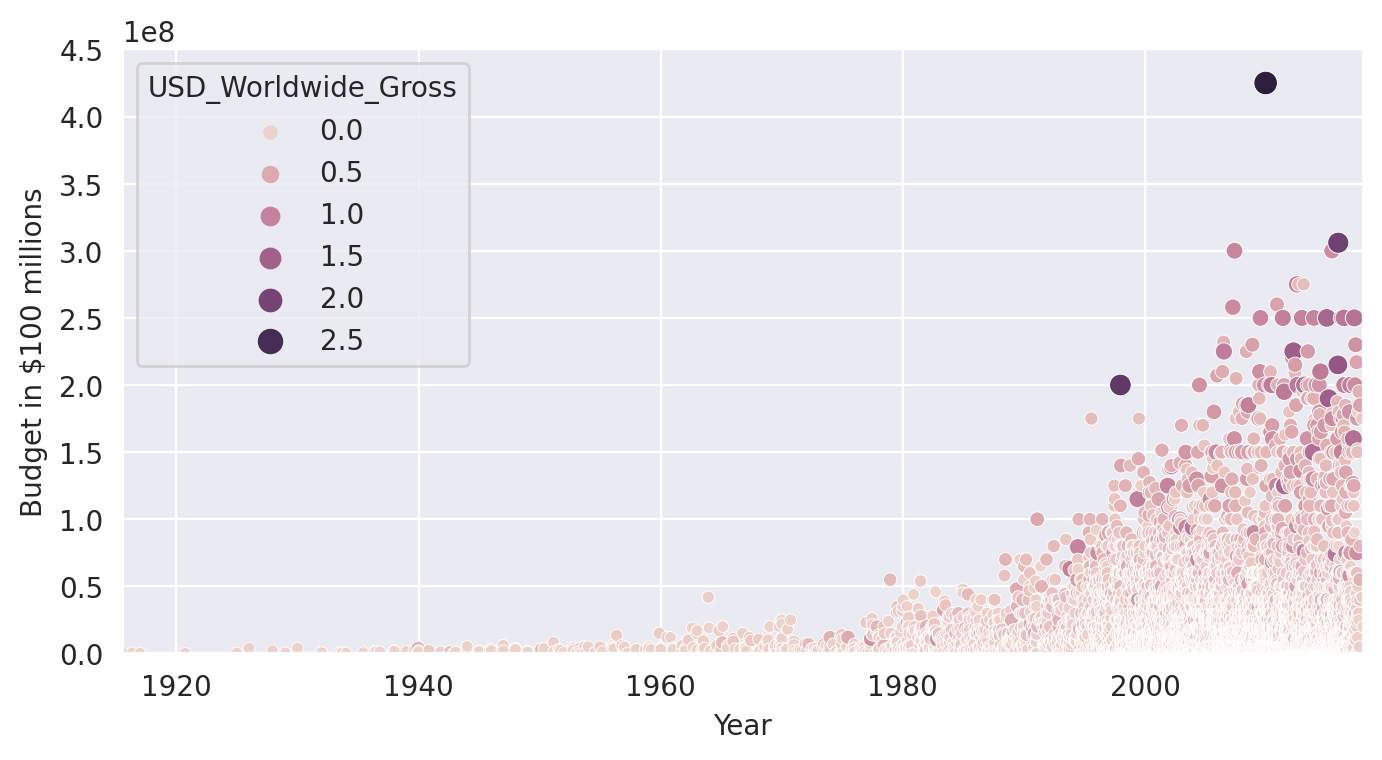

In [16]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(
      data=data_clean,
      x='Release_Date', 
      y='USD_Production_Budget',
      hue='USD_Worldwide_Gross',
      size='USD_Worldwide_Gross'
  )

ax.set(ylim=(0, 450000000),
       xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
       ylabel='Budget in $100 millions',
       xlabel='Year')

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [18]:
dt_index = pd.DatetimeIndex(data_clean["Release_Date"])
years = dt_index.year

data_clean["Decade"] = years//10*10
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5384 entries, 0 to 5383
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5384 non-null   int64         
 1   Release_Date           5384 non-null   datetime64[ns]
 2   Movie_Title            5384 non-null   object        
 3   USD_Production_Budget  5384 non-null   int64         
 4   USD_Worldwide_Gross    5384 non-null   int64         
 5   USD_Domestic_Gross     5384 non-null   int64         
 6   Decade                 5384 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 336.5+ KB


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [20]:
old_films = data_clean[data_clean["Decade"] < 1970]
new_films = data_clean[data_clean["Decade"] >= 1970]
print(old_films.shape)
print(old_films[old_films["USD_Production_Budget"]==old_films["USD_Production_Budget"].max()])

(153, 7)
     Rank Release_Date Movie_Title  USD_Production_Budget  \
109  1253   1963-12-06   Cleopatra               42000000   

     USD_Worldwide_Gross  USD_Domestic_Gross  Decade  
109             71000000            57000000    1960  


# Seaborn Regression Plots

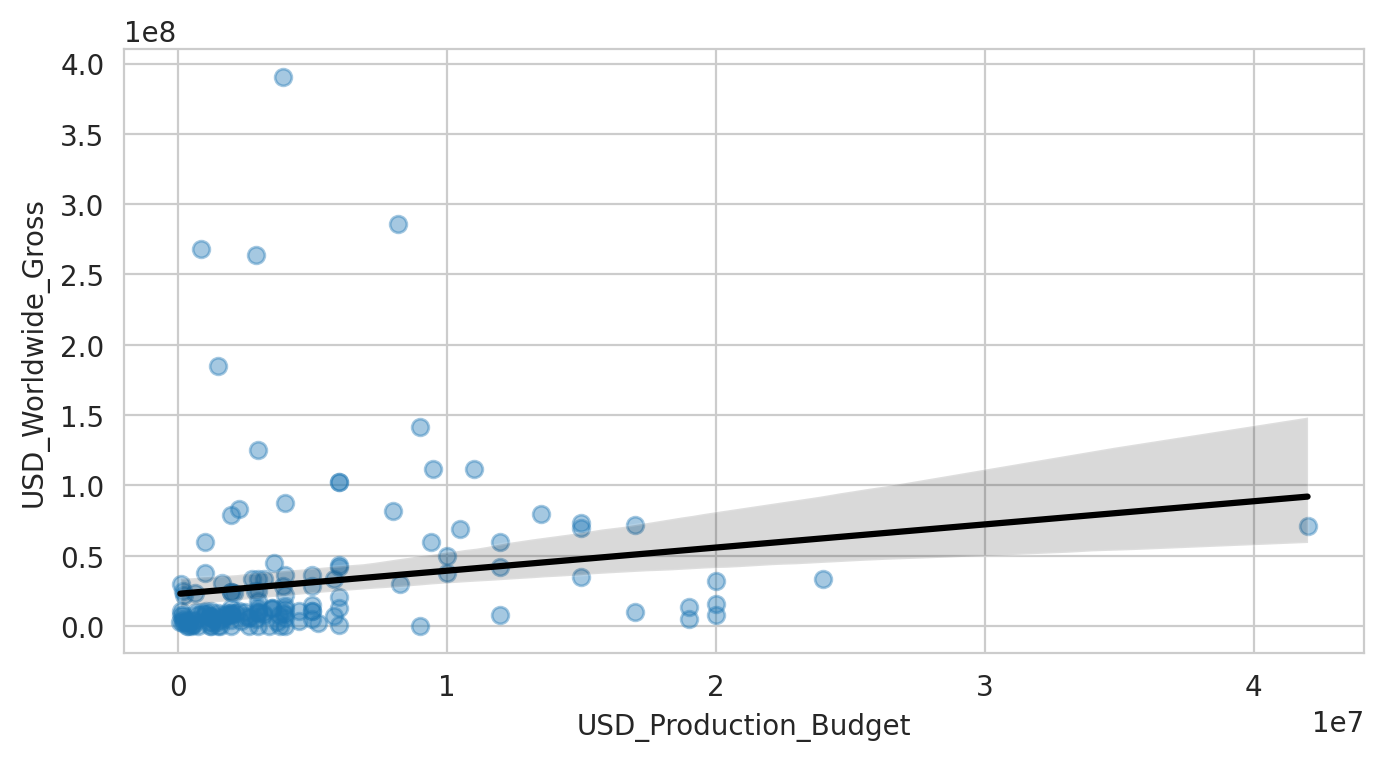

In [22]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  ax = sns.regplot(data=old_films, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

[(0.0, 2783918982.0),
 Text(48.00000000000003, 0.5, 'Revenue in $ billions'),
 (0, 425000000),
 Text(0.5, 48.0, 'Budget in $ millions')]

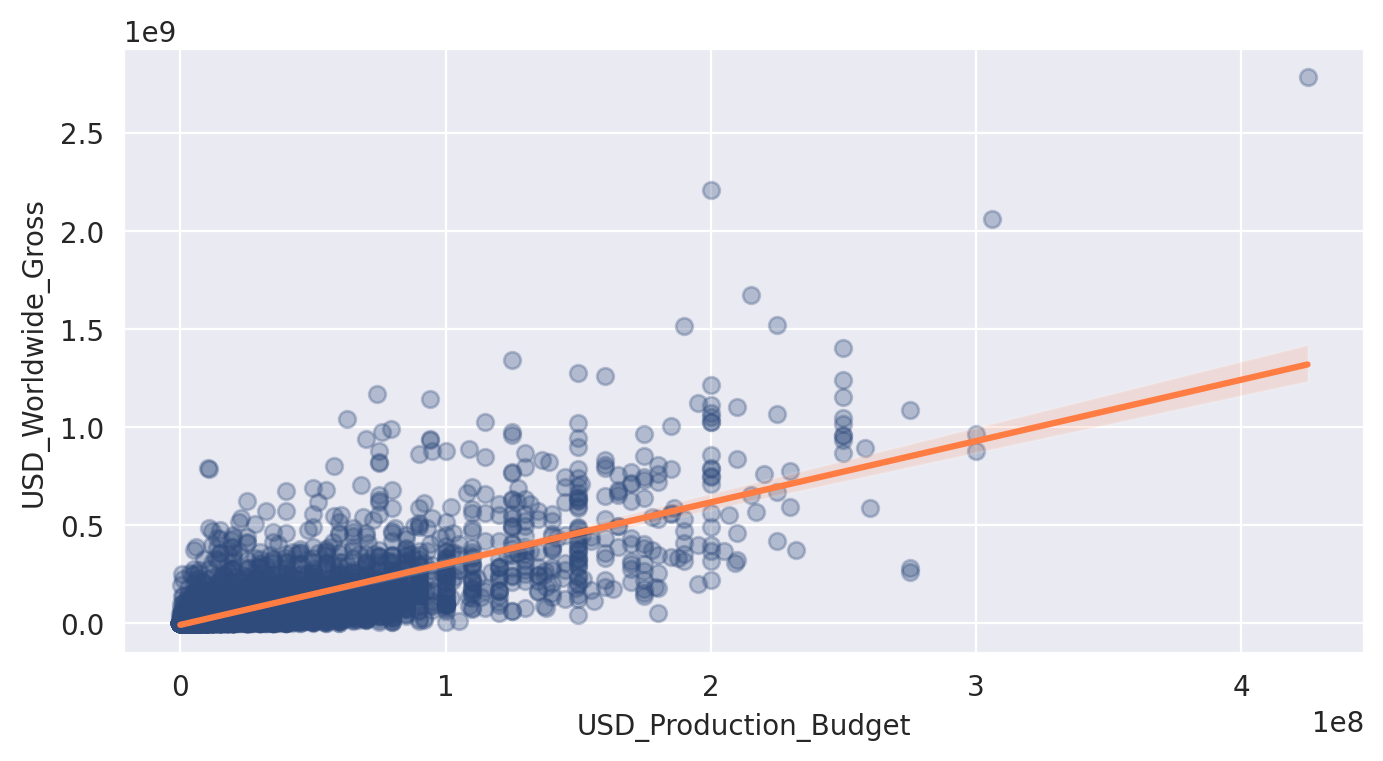

In [28]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("darkgrid"):
    sns.regplot(
        data=new_films, 
        x='USD_Production_Budget', 
        y='USD_Worldwide_Gross',
        scatter_kws = {'alpha': 0.3, 'color': '#2f4b7c'},
        line_kws = {'color': '#ff7c43'})
  
ax.set(
      xlim=(0, new_films['USD_Production_Budget'].max()),
      ylim=(0, new_films['USD_Worldwide_Gross'].max()),
      xlabel='Budget in $ millions',
      ylabel='Revenue in $ billions',
      )

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [37]:
new_regression = LinearRegression()

# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])
 
# Response Variable or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])

# Find the best-fit line
new_regression.fit(X, y)

# Theta zero (intercept)
print(new_regression.intercept_)

# Theta one
print(new_regression.coef_)

# R-squared
new_regression.score(X, y)

[-8650768.00661027]
[[3.12259592]]


0.5577032617720403

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [38]:
old_regression = LinearRegression()

X = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])

old_regression.fit(X, y)

print(f"The slope coefficient is: {old_regression.coef_[0]}")
print(f"The intercept is: {old_regression.intercept_[0]}")
print(f"The r-squared is: {old_regression.score(X, y)}")

The slope coefficient is: [1.64771314]
The intercept is: 22821538.635080386
The r-squared is: 0.02937258620576877


# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [16]:
# 22821538 + 1.64771314 * 350000000 intercept + slope coefficient * required feature(budget)

In [44]:
budget = 350000000
revenue_estimate_old = old_regression.intercept_[0] + old_regression.coef_[0,0]*budget
revenue_estimate_old = round(revenue_estimate_old, -6)
revenue_estimate_new = new_regression.intercept_[0] + new_regression.coef_[0][0]*budget
revenue_estimate_new = round(revenue_estimate_new)
print(f'The estimated revenue for a $350m old film is around ${revenue_estimate_old:.10}.')
print(f'The estimated revenue for a $350m new film is around ${revenue_estimate_new}.')

The estimated revenue for a $350m old film is around $600000000.0.
The estimated revenue for a $350m new film is around $1084257803.
